In [1]:
from moscot.problems.time import TemporalProblem
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import jax
import jax.numpy as jnp
import scanpy as sc

In [2]:
adata = sc.read("../../../../data/adata_pancreas_2022_processed_new.h5ad")

/home/dominikk/mambaforge/envs/ott/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


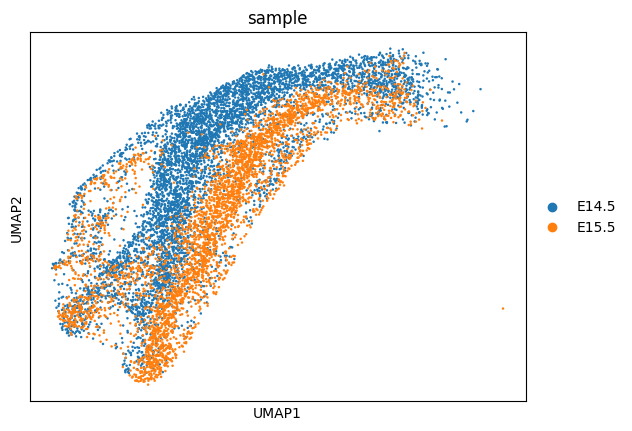

In [3]:
sc.pl.umap(adata, color="sample")

In [4]:
sc.pp.pca(adata, n_comps=10)

In [5]:
source = adata[adata.obs["sample"]=="E14.5"].obsm["X_pca"].copy()
target = adata[adata.obs["sample"]=="E15.5"].obsm["X_pca"].copy()

In [8]:
adata.obs

,n_counts,sample,n_genes,log_genes,mt_frac,rp_frac,ambi_frac,nCount_RNA,nFeature_RNA,nCount_ATAC,...,nucleosome_percentile,TSS.enrichment,TSS.percentile,S_score,G2M_score,phase,proliferation,celltype,nCount_peaks,nFeature_peaks
AAACAGCCAACAGCCT-1-0,8457.0,E14.5,3651,8.202756,0.008868,0.083126,0.297570,8435.0,3668,25556.0,...,0.90,6.345675,0.80,-0.248541,-0.283421,G1,Non-Cycling,Fev+ Alpha,14264.0,11029
AAACAGCCAACCCTCC-1-0,7841.0,E14.5,3120,8.045588,0.011988,0.089912,0.250641,6236.0,3129,43666.0,...,0.12,7.111463,0.96,-0.170332,-0.229097,G1,Non-Cycling,Fev+,24011.0,17126
AAACAGCCACTAAGCC-1-0,7915.0,E14.5,3318,8.107117,0.010360,0.080101,0.251073,7225.0,3329,35568.0,...,0.81,5.978800,0.55,-0.306645,-0.249291,G1,Non-Cycling,Fev+,20336.0,14985
AAACAGCCAGGATAAC-1-0,9193.0,E14.5,3666,8.206856,0.013706,0.161971,0.395085,9441.0,3679,10507.0,...,0.07,5.762530,0.36,-0.164715,-0.137242,G1,Non-Cycling,Ngn3 high,5917.0,5298
AAACAGCCATAAAGCA-1-0,8266.0,E14.5,3403,8.132413,0.007985,0.164771,0.316749,8060.0,3412,25270.0,...,0.27,5.770973,0.37,-0.208403,-0.194811,G1,Non-Cycling,Eps. progenitors,14365.0,11488
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTTGTGTTCGAGCTAT-1-1,8228.0,E15.5,3329,8.110427,0.007778,0.118133,0.297209,7991.0,3335,22960.0,...,0.85,6.677660,0.51,-0.166151,-0.244949,G1,Non-Cycling,Ngn3 high,12919.0,10352
TTTGTGTTCGATCAGT-1-1,9756.0,E15.5,4469,8.404920,0.004305,0.053506,0.318482,12704.0,4544,23328.0,...,0.97,7.556753,0.87,-0.300311,-0.165207,G1,Non-Cycling,Beta,13305.0,10774
TTTGTGTTCTCAATGA-1-1,7858.0,E15.5,3330,8.110728,0.005090,0.106770,0.241017,6846.0,3348,23386.0,...,0.99,6.758358,0.56,-0.226378,-0.220058,G1,Non-Cycling,Fev+ Alpha,13285.0,10705
TTTGTTGGTATTGAGT-1-1,8914.0,E15.5,3772,8.235361,0.005160,0.155261,0.356991,8961.0,3785,18048.0,...,0.40,6.909637,0.64,-0.310679,-0.209148,G1,Non-Cycling,Ngn3 low,10132.0,8203


In [10]:
adata.obs["day"] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)
tp = TemporalProblem(adata)
tp = tp.prepare(time_key="day", joint_attr="X_pca")

In [12]:
tp = tp.solve(epsilon=1e-1, scale_cost=1.0, max_iterations=1e7)

INFO     Solving `1` problems                                                                                      
INFO     Solving problem BirthDeathProblem[stage='solved', shape=(5539, 3826)].                                    


# Check the variances

In [14]:
bdata = adata.copy()
adata_early = adata[adata.obs["sample"]=="E14.5"]
adata_late = adata[adata.obs["sample"]=="E15.5"]
bdata_early = bdata[bdata.obs["sample"]=="E14.5"]
bdata_late = bdata[bdata.obs["sample"]=="E15.5"]

## Check variances on source

In [57]:
def sample_from_target(transport_matrix, target_distribution, random_key):
    res = jax.vmap(lambda x: jax.random.categorical(random_key, x))(jnp.log(transport_matrix))
    return target_distribution[res]



In [58]:
for j in range(10):
    res = [None] * 15
    for i in range(15):
        res[i]= sample_from_target(tp[14.5, 15.5].solution.transport_matrix, target, jax.random.PRNGKey(j*10+i))
    samples = jnp.array(res)
    vars = jnp.var(samples, axis=0)
    vars_summed = jnp.sum(vars, axis=1)
    bdata_early.obs[f"var_{j}"] = np.asarray(vars_summed)

In [59]:
ls_vars = []
for j in range(10):
    ls_vars.append(bdata_early.obs[["celltype", f"var_{j}"]].groupby("celltype").mean())

In [60]:
df_vars = pd.concat(ls_vars, axis=1)

In [61]:
var_cols = [f"var_{j}" for j in range(10)]
df_vars['mean_of_vars'] = df_vars[var_cols].mean(axis=1)
df_vars['var_of_vars'] = df_vars[var_cols].var(axis=1)

In [62]:
order_celltypes = ["Alpha", "Beta", "Delta", "Epsilon", "Fev+ Alpha", "Fev+ Beta", "Fev+ Delta", "Fev+", "Eps. progenitors", "Ngn3 high", "Ngn3 high cycling", "Ngn3 low"]
df_vars = df_vars.reindex(order_celltypes)

/tmp/ipykernel_52482/2473399689.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df_vars.index, rotation = 45)


[Text(0, 0, 'Alpha'),
 Text(1, 0, 'Beta'),
 Text(2, 0, 'Delta'),
 Text(3, 0, 'Epsilon'),
 Text(4, 0, 'Fev+ Alpha'),
 Text(5, 0, 'Fev+ Beta'),
 Text(6, 0, 'Fev+ Delta'),
 Text(7, 0, 'Fev+'),
 Text(8, 0, 'Eps. progenitors'),
 Text(9, 0, 'Ngn3 high'),
 Text(10, 0, 'Ngn3 high cycling'),
 Text(11, 0, 'Ngn3 low')]

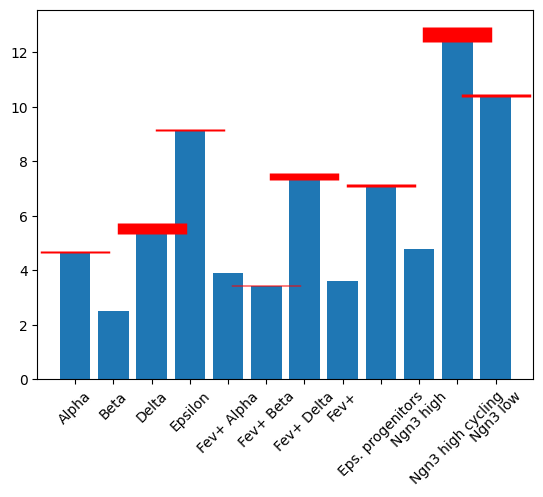

In [63]:
fig = plt.figure(1)
ax = fig.add_subplot(111)

plt.bar(df_vars.index, df_vars["mean_of_vars"], yerr=df_vars["var_of_vars"], error_kw=dict(elinewidth=50, ecolor='r'))
ax.set_xticklabels(df_vars.index, rotation = 45)

# Check accuracy of the model

In [75]:
cell_transition = tp.cell_transition(14.5, 15.5, {"celltype": order_celltypes}, {"celltype": order_celltypes}, forward=True)
cell_transition

,Alpha,Beta,Delta,Epsilon,Fev+ Alpha,Fev+ Beta,Fev+ Delta,Fev+,Eps. progenitors,Ngn3 high,Ngn3 high cycling,Ngn3 low
Alpha,7.874384e-01,0.172229,0.006229,0.009106,2.186746e-02,3.129665e-03,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
Beta,1.864140e-19,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
Delta,1.779200e-05,0.794240,0.074124,0.020575,1.652873e-02,9.451435e-02,2.833238e-19,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
Epsilon,1.481241e-01,0.038743,0.053459,0.673634,2.797443e-02,9.972148e-30,5.806503e-02,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
Fev+ Alpha,2.324887e-01,0.090029,0.003937,0.005904,4.668436e-01,1.963201e-01,4.477686e-03,2.167986e-32,0.000000,0.000000e+00,0.000000,0.000000
Fev+ Beta,6.439176e-03,0.603044,0.000826,0.000000,2.849241e-02,3.611988e-01,0.000000e+00,2.328397e-41,0.000000,0.000000e+00,0.000000,0.000000
Fev+ Delta,9.144909e-02,0.088506,0.100363,0.198729,1.015991e-01,9.508442e-02,2.720119e-01,4.061536e-02,0.006047,5.594492e-03,0.000000,0.000000
Fev+,5.140089e-03,0.019455,0.001486,0.001729,1.194420e-01,4.606853e-01,5.891029e-03,3.842608e-01,0.000000,9.109381e-12,0.001911,0.000000
Eps. progenitors,5.325864e-26,0.047451,0.016099,0.293944,1.324622e-08,2.459288e-03,2.476479e-01,1.260200e-02,0.283100,9.669744e-02,0.000000,0.000000
Ngn3 high,1.574315e-03,0.030442,0.002565,0.003715,3.609466e-03,2.519268e-02,8.767352e-03,1.549818e-01,0.035644,7.235400e-01,0.005880,0.004089


<Axes: >

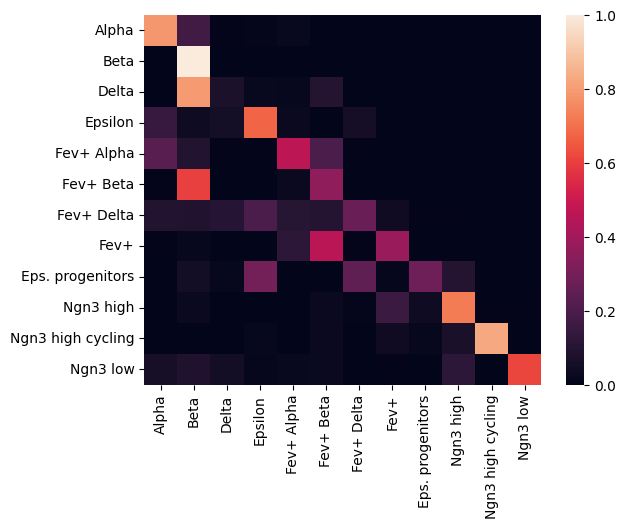

In [76]:
import seaborn as sns
sns.heatmap(cell_transition)